# Capstone 1 -- Data Story Telling

## Drug consumption (quantified) Data Set
## Alissa Mezzacappa -- 2/12/2018

Psychoactive drug abuse can creates risks for users and those around them. Drug consumption risks include poor health, early mortality, and societal consequences. For example, the opioid epidemic not only claims the lives of users, but leaves children without mothers and creates criminals out of law abiding citizens because of the addictive nature of these drugs.  However, it is possible that some fraction of this destruction is preventable. In the case of opiods, if a pain management doctor was given the risk profile of patient for opioid addiction, this insight could inform his/her choice of prescription pain medication, potentially saving a life and a lot of societal suffering.

Fehrman et al. 2015  created a database of drug consumption data available on the UCI Machine Learning Repository that can enable just this type of modeling of drug risk behavior. Using an online survey methodology, 32 attributes were collected from real people with usable data from 1885 persons. These attributes include the Big Five personality traits, impulsivity, sensation seeking, demographic information such as age, gender, education, country, ethnicity, and usage of 18 different legal and illegal drugs. This data set already has false data removed by identifying individuals that claimed drug use of a fictional drug included in the survey.

__In this notebook I begin investegation the drug consumption (quantified) data set with visualiztions of the data. 
To begin import packages and data. Additionally, create column headers via scraping data description pdf.__


In [1]:
print('Data Story: Evaluation of Drug Consumption Risk')
import pandas as pd
import urllib
import re
import matplotlib.pyplot as py
import matplotlib.pyplot as plt

u=urllib.urlopen('http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29')
text=u.read()

matches=re.findall(r"\d+\.\s\w+", text)
del(matches[0:3])
del(matches[12])
for i in range(0, len(matches)):
    matches[i]=re.sub(r"\d+\.\s","",matches[i])
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"
data = pd.read_csv(url,names=matches) #import data
data.head()

Data Story: Evaluation of Drug Consumption Risk


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


__Now with the data formated into a dataframe, lets take a quick look at the data visually to check for obvious characteristics of the population surveyed__


Data is more representative of young adults than older adults
How does age trend with education?


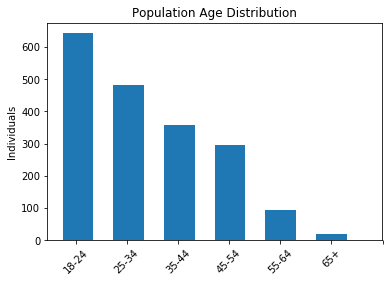

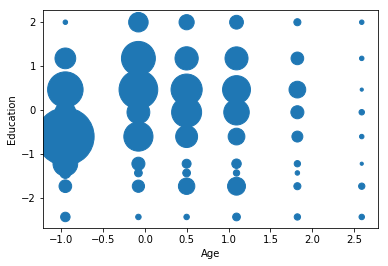

In [2]:
%matplotlib inline
#Age
age=['','18-24','25-34','35-44','45-54','55-64','65+']

ax=py.subplot(111)
py.hist(data.Age*.84+.17,bins=6,histtype='bar', align='mid',width=0.3)
py.ylabel('Individuals')
ax.set_xticklabels(age,rotation=45)
py.title('Population Age Distribution')
print('Data is more representative of young adults than older adults')
print('How does age trend with education?')
c=data[['Age','Education']].groupby(['Age','Education'], as_index=False).size()  #make age and education to become columns
c=c.rename('Counts') #rename count column
df=c.to_frame() #convert to dataframe
df.reset_index(inplace=True)
df.plot.scatter(x='Age', y='Education', s=df['Counts']*10) 

From the first plot, we see that the survey is biased toward the 18-24 and 25-34 age ranges.
From the seond plot, we see 18-24 year olds have less education on average in this population than the other groups.

Within the data set survey takers are asked when the last time they used the drug was. We will investegate how the population breaks ddown when we bin the data based on last usage.

__Bin the data based on usage type by replacing appropriate identifiers with True/False assignemnts.__

In [5]:
# CL0 -- never use
data0=data.replace(['CL0'],0)
data0=data0.replace(['CL1','CL2','CL3','CL4','CL5','CL6'],1) 
#CL1 -- over a decade
data1=data.replace(['CL0','CL1'],0)
data1=data1.replace(['CL2','CL3','CL4','CL5','CL6'],1) 
#CL2 -- last decade
data2=data.replace(['CL0','CL1','CL2'],0)
data2=data2.replace(['CL3','CL4','CL5','CL6'],1) 
#Cl3 -- last year
data3=data.replace(['CL0','CL1','CL2','CL3'],0)
data3=data3.replace(['CL4','CL5','CL6'],1) 
#CL4 -- last month
data4=data.replace(['CL0','CL1','CL2','CL3','CL4'],0)
data4=data4.replace(['CL5','CL6'],1) 
#CL5 -- last week
data5=data.replace(['CL0','CL1','CL2','CL3','CL4','CL5'],0)
data5=data5.replace(['CL6'],1) 
#CL6 -- last  day

__
__

__Now we plot a histogram of any drug use across all drug types__

What is the drug use in this population?
    Alcohol    Amphet      Amyl    Benzos      Caff  Cannabis      Choc  \
1  0.981963  0.482228  0.307692  0.469496  0.985676  0.780902  0.983024   
0  0.018037  0.517772  0.692308  0.530504  0.014324  0.219098  0.016976   

       Coke    Crack   Ecstasy    Heroin  Ketamine    Legalh       LSD  \
1  0.449337  0.13687  0.458355  0.148541  0.209549  0.419629  0.432891   
0  0.550663  0.86313  0.541645  0.851459  0.790451  0.580371  0.567109   

      Meth  Mushrooms  Nicotine     Semer       VSA  
1  0.24191   0.479045  0.772944  0.004244  0.228117  
0  0.75809   0.520955  0.227056  0.995756  0.771883  


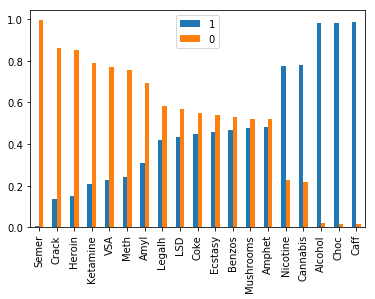

In [6]:
print('What is the drug use in this population?')
import numpy as np
drug_data=data0.iloc[:,13:32]
columns=drug_data.columns
ddvc=pd.DataFrame()
for column in columns:
    ddvc[column]=drug_data[column].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)#.sort_values() #frequency
print(ddvc.head())
ddvc1=ddvc.T
ddvc1.sort_values([1,0]).plot.bar()



Above we can see in blue the legal drugs have the most usage for this ever used class followed by Canabis and Nicotine which have very similar values. Less usage is seen for drugs like Amphetamines, Coke, LSD, and even less usage in drugs like Meth, Heroin, and Crack. 

Lets take a look at this breakdown by age:

In [7]:
#bin ages
d0a2=data0[data0.Age==-0.07854]
d0a1=data0[data0.Age<-0.9]
d0a3=data0[(data0.Age>0.4) & (data0.Age<0.55)]
d0a4=data0[data0.Age==1.09449]
d0a5=data0[data0.Age==1.82213]
d0a6=data0[data0.Age==2.59171]

#bin ages
d3a2=data3[data3.Age==-0.07854]
d3a1=data3[data3.Age<-0.9]
d3a3=data3[(data3.Age>0.4) & (data0.Age<0.55)]
d3a4=data3[data3.Age==1.09449]
d3a5=data3[data3.Age==1.82213]
d3a6=data3[data3.Age==2.59171]

Above we have taken two drug usage classses: Ever used and used within the last month. We bin these by age to investegate the breakdown of population.

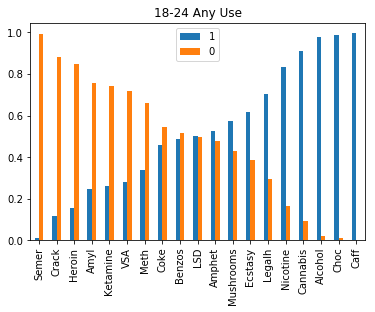

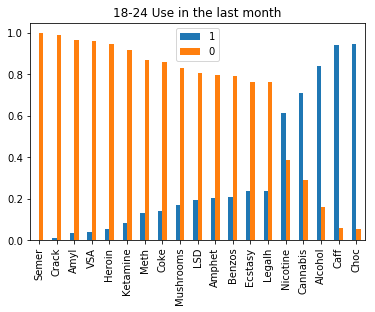

In [8]:

drug_data=d0a1.iloc[:,13:32]
columns=drug_data.columns
ddvc=pd.DataFrame()
for column in columns:
    ddvc[column]=drug_data[column].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)#.sort_values() #frequency
#print(ddvc.head())
ddvc1=ddvc.T
ddvc1.sort_values([1,0]).plot.bar()
plt.title('18-24 Any Use')

drug_data=d3a1.iloc[:,13:32]
columns=drug_data.columns
ddvc=pd.DataFrame()
for column in columns:
    ddvc[column]=drug_data[column].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)#.sort_values() #frequency
#print(ddvc.head())
ddvc1=ddvc.T
ddvc1.sort_values([1,0]).plot.bar()
plt.title('18-24 Use in the last month')

Canabis use is highly prevelant in the 18-24 range.

In [12]:
ddvc1.axes

[Index([u'Alcohol', u'Amphet', u'Amyl', u'Benzos', u'Caff', u'Cannabis',
        u'Choc', u'Coke', u'Crack', u'Ecstasy', u'Heroin', u'Ketamine',
        u'Legalh', u'LSD', u'Meth', u'Mushrooms', u'Nicotine', u'Semer',
        u'VSA'],
       dtype='object'), Int64Index([1, 0], dtype='int64')]

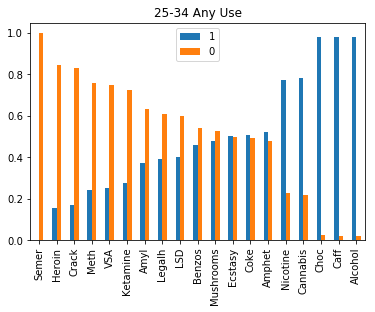

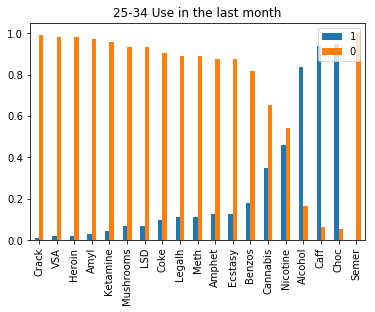

In [49]:
drug_data=d0a2.iloc[:,13:32]
columns=drug_data.columns
ddvc=pd.DataFrame()
for column in columns:
    ddvc[column]=drug_data[column].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)#.sort_values() #frequency
#print(ddvc.head())
ddvc1=ddvc.T
ddvc1.sort_values([1,0]).plot.bar()
plt.title('25-34 Any Use')

drug_data=d3a2.iloc[:,13:32]
columns=drug_data.columns
ddvc=pd.DataFrame()
for column in columns:
    ddvc[column]=drug_data[column].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)#.sort_values() #frequency
#print(ddvc.head())
ddvc1=ddvc.T
ddvc1.sort_values([1,0]).plot.bar()
plt.title('25-34 Use in the last month')

Use of Canabis in the 25-34 class is lower than the 18-24 class.

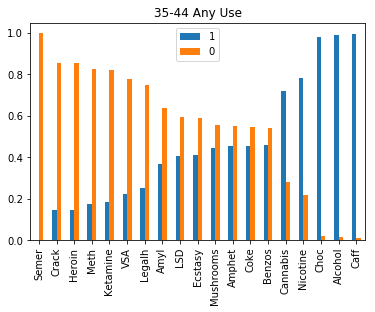

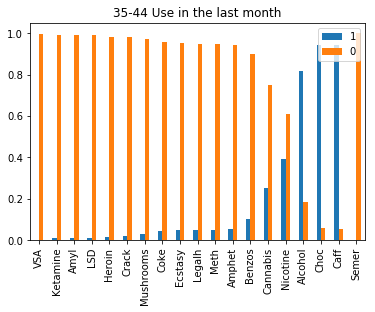

In [53]:
drug_data=d0a3.iloc[:,13:32]
columns=drug_data.columns
ddvc=pd.DataFrame()
for column in columns:
    ddvc[column]=drug_data[column].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)#.sort_values() #frequency
#print(ddvc.head())
ddvc1=ddvc.T
ddvc1.sort_values([1,0]).plot.bar()
plt.title('35-44 Any Use')

drug_data=d3a3.iloc[:,13:32]
columns=drug_data.columns
ddvc=pd.DataFrame()
for column in columns:
    ddvc[column]=drug_data[column].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)#.sort_values() #frequency
#print(ddvc.head())
ddvc1=ddvc.T
ddvc1.sort_values([1,0]).plot.bar()
plt.title('35-44 Use in the last month')

Usage of hard drugs in the 34-44 class in the past month is significantly lower.

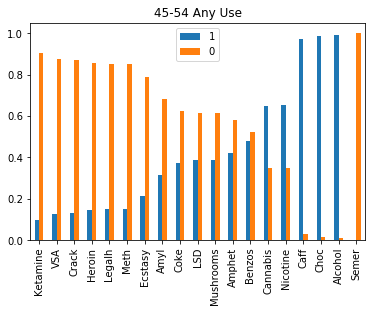

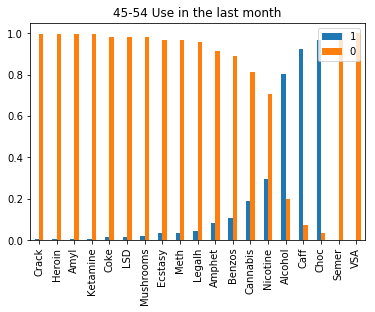

In [54]:
drug_data=d0a4.iloc[:,13:32]
columns=drug_data.columns
ddvc=pd.DataFrame()
for column in columns:
    ddvc[column]=drug_data[column].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)#.sort_values() #frequency
#print(ddvc.head())
ddvc1=ddvc.T
ddvc1.sort_values([1,0]).plot.bar()
plt.title('45-54 Any Use')

drug_data=d3a4.iloc[:,13:32]
columns=drug_data.columns
ddvc=pd.DataFrame()
for column in columns:
    ddvc[column]=drug_data[column].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)#.sort_values() #frequency
#print(ddvc.head())
ddvc1=ddvc.T
ddvc1.sort_values([1,0]).plot.bar()
plt.title('45-54 Use in the last month')

Canabis usage continues to drop as age class increases.

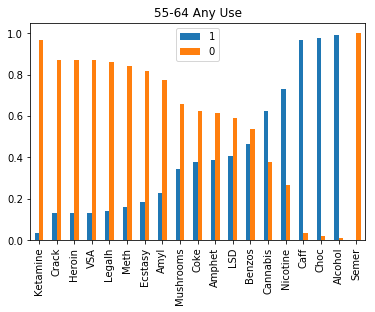

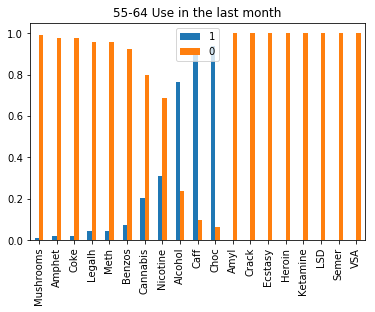

In [55]:
drug_data=d0a5.iloc[:,13:32]
columns=drug_data.columns
ddvc=pd.DataFrame()
for column in columns:
    ddvc[column]=drug_data[column].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)#.sort_values() #frequency
#print(ddvc.head())
ddvc1=ddvc.T
ddvc1.sort_values([1,0]).plot.bar()
plt.title('55-64 Any Use')

drug_data=d3a5.iloc[:,13:32]
columns=drug_data.columns
ddvc=pd.DataFrame()
for column in columns:
    ddvc[column]=drug_data[column].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)#.sort_values() #frequency
#print(ddvc.head())
ddvc1=ddvc.T
ddvc1.sort_values([1,0]).plot.bar()
plt.title('55-64 Use in the last month')

Usage of many hard drugs such as Crack and Heroin is non-existant in the 55-64 age class, potentially these drug users don't make it these ages.

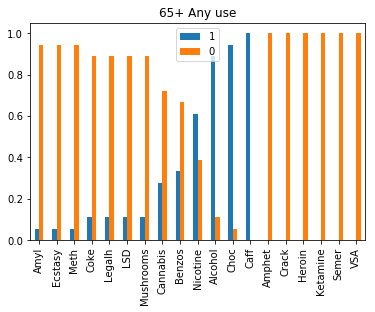

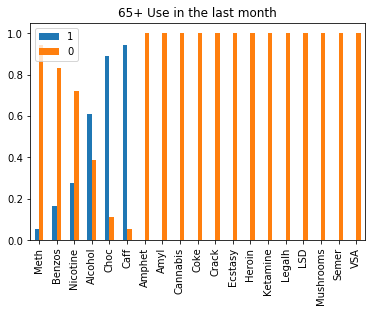

In [56]:
drug_data=d0a6.iloc[:,13:32]
columns=drug_data.columns
ddvc=pd.DataFrame()
for column in columns:
    ddvc[column]=drug_data[column].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)#.sort_values() #frequency
#print(ddvc.head())
ddvc1=ddvc.T
ddvc1.sort_values([1,0]).plot.bar()
plt.title('65+ Any use')

drug_data=d3a6.iloc[:,13:32]
columns=drug_data.columns
ddvc=pd.DataFrame()
for column in columns:
    ddvc[column]=drug_data[column].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)#.sort_values() #frequency
#print(ddvc.head())
ddvc1=ddvc.T
ddvc1.sort_values([1,0]).plot.bar()
plt.title('65+ Use in the last month')

Sample size is probably too small to attemt to draw an inference.

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)